# Pandas Lab Exercise - Solutions

We will be using the [games Dataset](https://www.kaggle.com/gutsyrobot/games-data/data) from Kaggle. 

Answer each question asked below wrt the games dataset.

**Import pandas as pd, seaborn as sns.**

In [76]:
import pandas as pd
import seaborn as sns

**Read games.csv as a dataframe called games.**

In [2]:
games=pd.read_csv("games.csv")

**Check the head of the DataFrame.**

In [3]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


**Use .info() method to find out total number of entries in dataset**

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    81312 non-null  int64  
 1   type                  81312 non-null  object 
 2   name                  81271 non-null  object 
 3   yearpublished         81309 non-null  float64
 4   minplayers            81309 non-null  float64
 5   maxplayers            81309 non-null  float64
 6   playingtime           81309 non-null  float64
 7   minplaytime           81309 non-null  float64
 8   maxplaytime           81309 non-null  float64
 9   minage                81309 non-null  float64
 10  users_rated           81312 non-null  int64  
 11  average_rating        81312 non-null  float64
 12  bayes_average_rating  81312 non-null  float64
 13  total_owners          81312 non-null  int64  
 14  total_traders         81312 non-null  int64  
 15  total_wanters      

**What is the mean playing time for all games put together?**

In [5]:
games["playingtime"].mean()

51.63478827682052

**What is the highest number of comments received for a game?**

In [9]:
games["users_rated"].nlargest(1)

165    53680
Name: users_rated, dtype: int64

**What is the name of the game with id 1500?**

In [14]:
games[games["id"]==1500]["name"]

10592    Zocken
Name: name, dtype: object

**And which year was it published?**

In [20]:
games[games["id"]==1500]["yearpublished"]

10592    1999.0
Name: yearpublished, dtype: float64

**Which game has received highest number of comments?**

In [39]:
max_comments=games[games["users_rated"]==games["users_rated"].max()]
max_comments[["name","users_rated"]]

,name,users_rated
165,Catan,53680
1965,Catan,53680


**Which games have received least number of comments?**

In [44]:
min_comments=games[games["users_rated"]==games["users_rated"].min()]
min_comments[["name","users_rated"]]

,name,users_rated
13048,Looney Leo,0
13068,Field of Fire,0
13114,LifeLinks,0
13116,Dear Abby,0
13124,Rolazone,0
...,...,...
81307,Micro Rome: Aegyptus,0
81308,Trivial Pursuit: Marvel Cinematic Universe Da...,0
81309,BEARanoia,0
81310,Freight,0


**What was the average minage of all games per game "type"? (boardgame & boardgameexpansion)**

In [63]:
games.groupby(["type"]).mean()["minage"]


type
boardgame             6.724798
boardgameexpansion    8.733321
Name: minage, dtype: float64

**How many unique games are there in the dataset?**

In [47]:
games["name"].nunique()

76035

**How many boardgames and boardgameexpansions are there in the dataset?**

In [48]:
games["type"].value_counts()

boardgame             70820
boardgameexpansion    10492
Name: type, dtype: int64

__Insights__
- There are 70820 board games and 10492 boardgameexpansions

**Is there a correlation between playing time and total comments for the games? - Use the .corr() function**

In [82]:
ds=games[["playingtime","total_comments"]]
ds
corr=ds.corr(method='pearson')#[["playingtime","total_comments"]]
corr

,playingtime,total_comments
playingtime,1.000000,0.020645
total_comments,0.020645,1.000000


<AxesSubplot:>

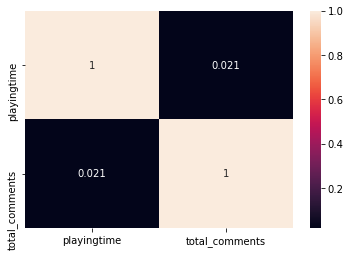

In [83]:
sns.heatmap(corr,annot=True)

### The END